# USE CASE
Febi Andika Dani Fajar Suryawan
<br>
27 Agustus 2019

In [321]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
spec=pd.read_csv('Automobile/automobile-spec.csv',delimiter=",")
risk=pd.read_csv('Automobile/automobile-risk.csv',delimiter=",")
losses=pd.read_csv('Automobile/automobile-losses.csv',delimiter=",")

In [291]:
spec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Part 1

### 1. Join 3 tables using ID as key

In [13]:
join1=pd.merge(spec,risk,how='left',on='ID')
join2=pd.merge(join1,losses,how='left',on='ID')
join2.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3,NaN
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3,NaN
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,NaN
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0


### 2.Quick-look

In [17]:
#Dimension
join2.shape

(205, 27)

In [24]:
#Summary
join2.describe()

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,205.000000,164.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,0.834146,122.000000
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,1.245307,35.442168
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000,65.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,94.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000,115.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,2.000000,150.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000,256.000000


In [22]:
#Data type
join2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

### 3. Missing value

In [26]:
join2.isnull().sum()

ID                    0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
symboling             0
normalized-losses    41
dtype: int64

#### Because there are many missing values in normalized-losses variable, so this variable is dropped. Missing values in other variable will be added using its median or mode.

In [257]:
#dropped normalized-losses column
data=join2.drop(columns=['normalized-losses'])
data.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [296]:
#add the missing values
for column in data[['bore', 'stroke', 'horsepower', 'peak-rpm','price']]:
    median = data[column].median()
    data[column] = data[column].fillna(median)
data['num-of-doors']=data['num-of-doors'].fillna('four')
data.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
symboling            0
dtype: int64

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-null float64
peak-rpm             205 non-

### 4. Visualization Data

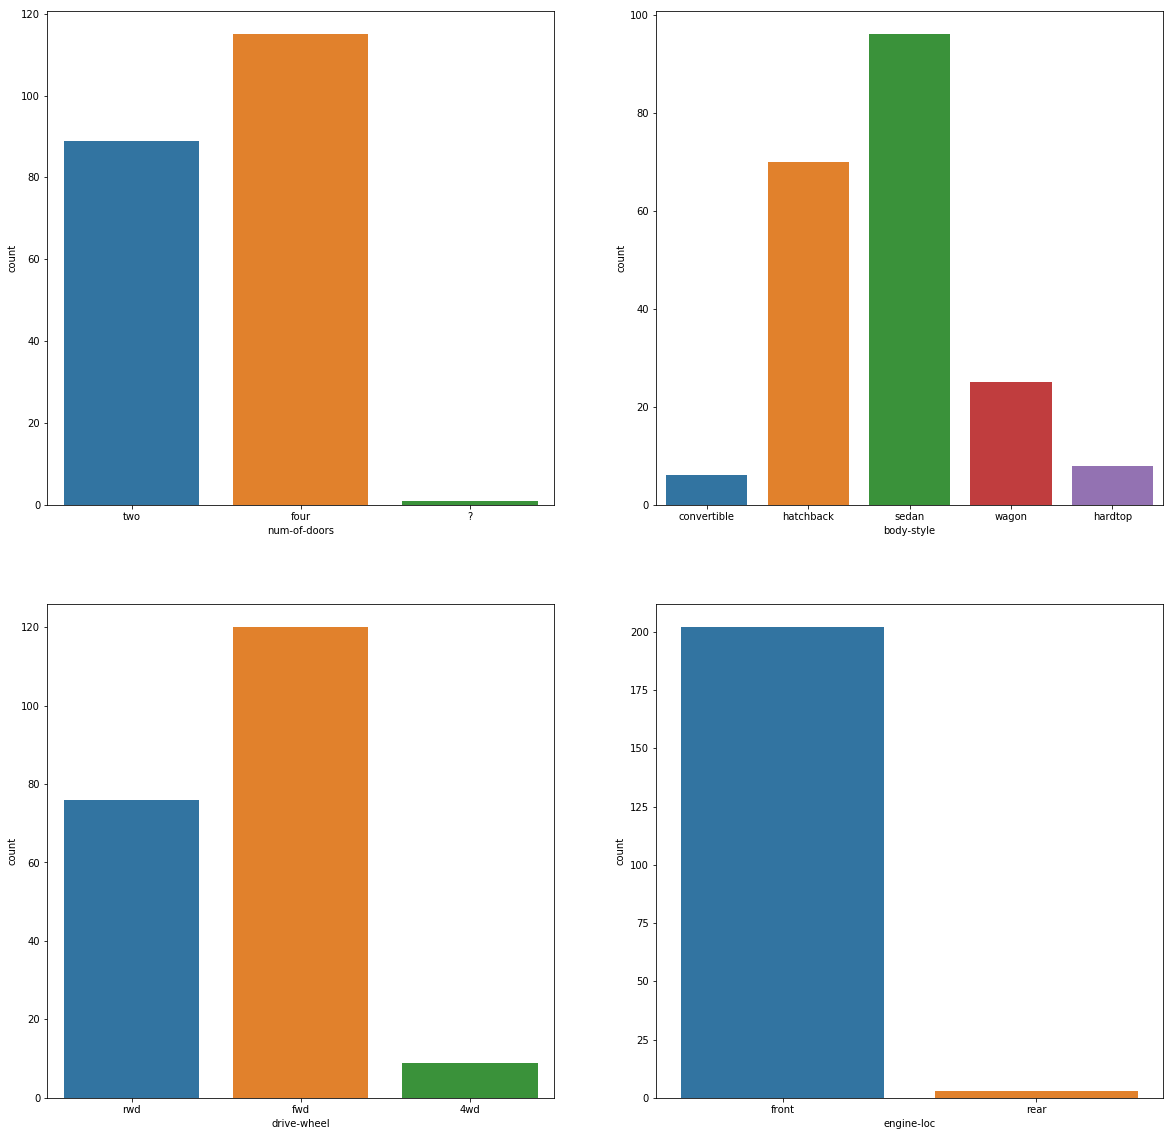

In [142]:
#Histogram plot of num-of-doors, body-style, drive-wheel, engine-loc variables 
category=data.columns[[4,5,6,7]]
data_category=data[category]
j=1
f=plt.figure(figsize=(20,20))
for i in category:
    f.add_subplot(2,2,j)
    sns.countplot(data_category[i])
    
    j=j+1
plt.show()

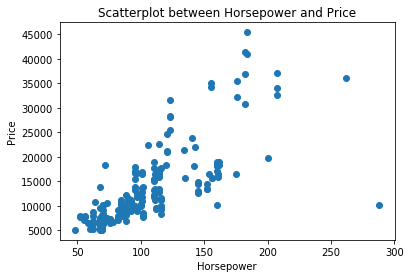

In [320]:
#Scatterplot between horsepower and price variables
plt.scatter(x=data['horsepower'],y=data['price'])
plt.title('Scatterplot between Horsepower and Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

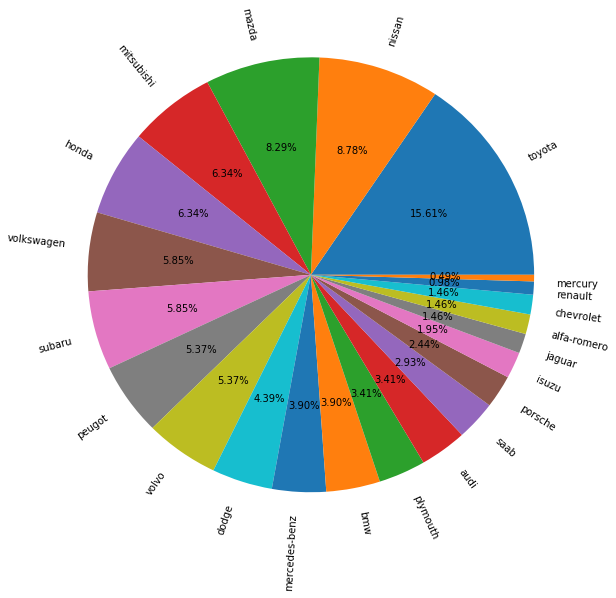

In [316]:
#Pie-chart of the number of cars by brands ('make')
group=pd.DataFrame(data['make'].value_counts()).reset_index()
f=plt.figure(figsize=(5,5))
plt.pie(group['make'],labels=group['index'],radius=2,rotatelabels=True,autopct='%.2f%%')
plt.show()


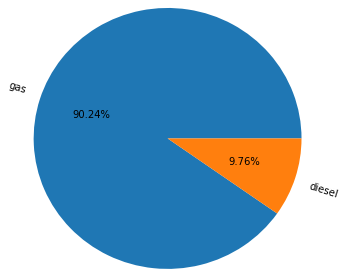

In [262]:
#Pie chart of fuel-type variable
group=pd.DataFrame(data['fuel-type'].value_counts()).reset_index()
f=plt.figure(figsize=(3,3))
plt.pie(group['fuel-type'],labels=group['index'],radius=2,rotatelabels=True,autopct='%.2f%%')
plt.show()

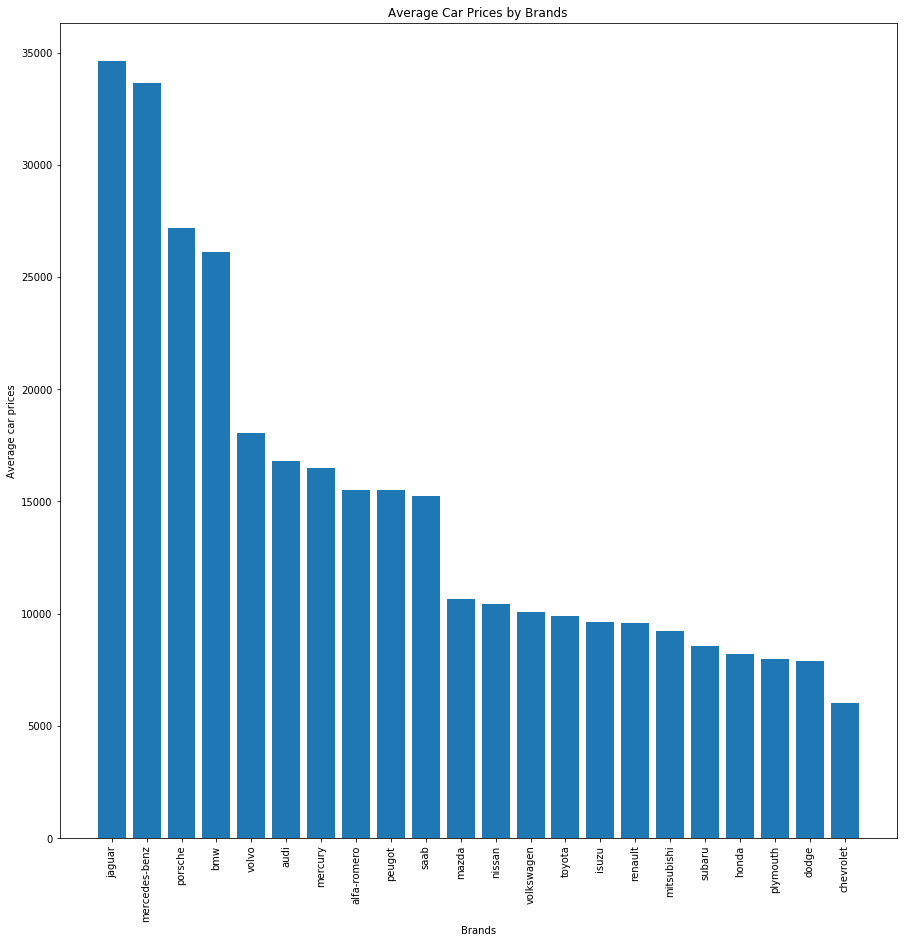

In [319]:
#Barplot of average car prices by brands (make)
ave=pd.DataFrame(data.groupby(data['make']).mean().sort_values(by='price',ascending=False).reset_index())
f=plt.figure(figsize=(15,15))
x=range(22)
plt.bar(x,ave['price'],width=0.8,align='center')
plt.xticks(x,ave['make'],rotation='vertical')
plt.title('Average Car Prices by Brands')
plt.xlabel('Brands')
plt.ylabel('Average car prices')
plt.show()

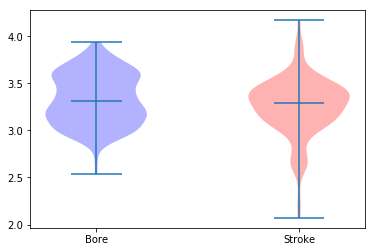

In [287]:
#Violin plots of bore and stroke variables
new = data[['bore', 'stroke']]
new_array=np.array(new)
colors = ['blue', 'red']
vp = plt.violinplot(new_array,
                    showmedians=True)

plt.xticks([1, 2], ['Bore', 'Stroke'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])

plt.show()    

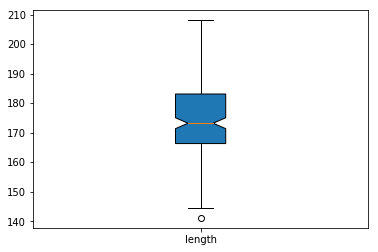

In [290]:
#boxplot of length variable
le_array=np.array(data['length'])
bp = plt.boxplot(le_array, 
                 patch_artist=True,
                 notch=True)
plt.xticks([1],['length'])
plt.show()

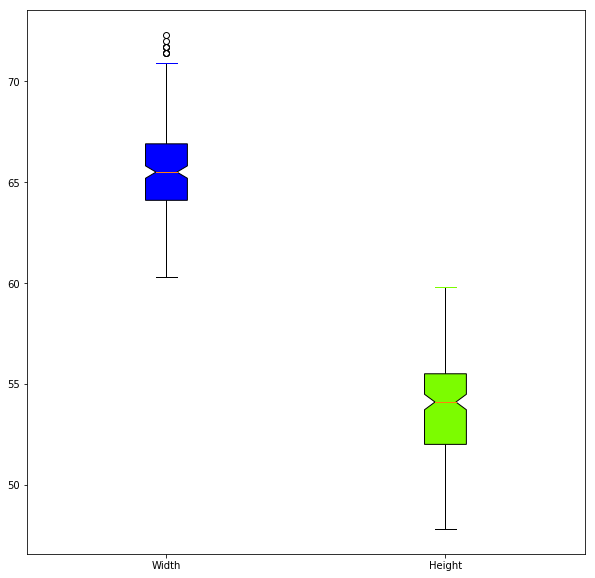

In [288]:
#boxplots of width and height variables 
st = data[['width', 'height']]
st_array=np.array(st)
colors = ['blue', 'lawngreen']

f=plt.figure(figsize=(10,10))
bp = plt.boxplot(st_array, 
                 patch_artist=True,
                 notch=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])
    
plt.xticks([1, 2], ['Width', 'Height'])

plt.show()

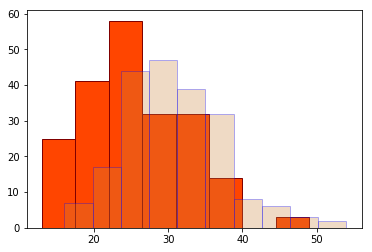

In [313]:
#Multiple histograms of city-mpg and highway-mpg variables
plt.hist(data['city-mpg'], 
         facecolor='orangered', 
         edgecolor='maroon', 
         bins=8)

plt.hist(data['highway-mpg'], 
         facecolor='peru', 
         edgecolor='blue', 
         bins=10, 
         alpha = 0.3)

plt.show()

## Part 2

### 1. Car brand with highest price

In [112]:
data[['make','price']].sort_values('price',ascending=False).head(1)


,make,price
74,mercedes-benz,45400.0


### 2. Maximum horsepower for car with 6 cylinder engine

In [292]:
cylinder6=data[data['cylinder'] == 'six']
cylinder6[['make','cylinder','horsepower']].sort_values(by='horsepower',ascending=False).head(1)


,make,cylinder,horsepower
126,porsche,six,207.0


### 3. Average peak-rpm for 'turbo' style aspiration car

In [131]:
turbo=data[data['aspiration'] == 'turbo']
print('The average peak-rpm for turbo style aspiration car is '+str(turbo['peak-rpm'].mean()))

The average peak-rpm for turbo style aspiration car is 4939.189189189189


### 4. Average price based on body-style

In [294]:
data[['price']].groupby(data['body-style']).mean().sort_values(by='price',ascending=False)

,price
body-style,
hardtop,22208.500000
convertible,21890.500000
sedan,14372.989583
wagon,12371.960000
hatchback,9967.085714


### 5. Average price based on body-style only for Honda car (make=Honda)

In [295]:
avg=data[data['make'] == 'honda']
avg[['price']].groupby(data['body-style']).mean().sort_values(by='price',ascending=False)

,price
body-style,
sedan,9945.000000
wagon,7295.000000
hatchback,7054.428571
